In [284]:
# import
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [258]:
df = pd.read_excel(r'../Datasets/Turbo_az_Kia_all_vehicles.xlsx')
df.head(2)

,City,Brand,Model,Year,Body Type,Color,Engine Details,Mileage,Transmission,Drive Type,İs_New?,Seat Count,Owner Count,Condition,Origin,Price,Product_link,Saler_name
0,Bakı,Kia,Cerato,2019,Sedan,Boz,2.0 L/150 a.g./Benzin,25 000 km,Avtomat,Ön,Xeyr,5,değer yok,"Vuruğu yoxdur, rənglənməyib",Amerika,30 500 AZN,https://turbo.az/autos/7577541-kia-cerato,"Avtosalon ""Eurocar"""
1,Bakı,Kia,Sorento,2015,Offroader / SUV,Qara,2.0 L/184 a.g./Dizel,44 000 km,Avtomat,Tam,Xeyr,değer yok,1,"Vuruğu yoxdur, rənglənməyib",Koreya,46 500 AZN,https://turbo.az/autos/7509258-kia-sorento,"Avtosalon ""AEN Cars"""


In [259]:
df['Price'] = (df['Price'].str.replace(' AZN', '').str.replace(' USD', '').str.replace(' ', '').astype(float, errors='ignore'))
print(df)


          City Brand    Model  Year        Body Type Color  \
0         Bakı   Kia   Cerato  2019            Sedan   Boz   
1         Bakı   Kia  Sorento  2015  Offroader / SUV  Qara   
2         Bakı   Kia   Cerato  2022            Sedan    Ağ   
3     Sumqayıt   Kia      Rio  2023          Hetçbek    Ağ   
4         Bakı   Kia   Cerato  2020            Sedan   Göy   
...        ...   ...      ...   ...              ...   ...   
3401      Bakı   Kia     Ceed  2007          Hetçbek  Qara   
3402      Bakı   Kia   Optima  2016            Sedan    Ağ   
3403      Bakı   Kia  Sorento  2015  Offroader / SUV    Ağ   
3404      Bakı   Kia   Optima  2016            Sedan    Ağ   
3405      Bakı   Kia     Ceed  2010        Universal  Mavi   

             Engine Details     Mileage Transmission Drive Type İs_New?  \
0     2.0 L/150 a.g./Benzin   25 000 km      Avtomat         Ön    Xeyr   
1      2.0 L/184 a.g./Dizel   44 000 km      Avtomat        Tam    Xeyr   
2     1.6 L/130 a.g./Benzin   

In [260]:
df['Mileage'] = (df['Mileage'].str.replace(' km', '').str.replace(' ', '').astype(float, errors='ignore'))
print(df)

          City Brand    Model  Year        Body Type Color  \
0         Bakı   Kia   Cerato  2019            Sedan   Boz   
1         Bakı   Kia  Sorento  2015  Offroader / SUV  Qara   
2         Bakı   Kia   Cerato  2022            Sedan    Ağ   
3     Sumqayıt   Kia      Rio  2023          Hetçbek    Ağ   
4         Bakı   Kia   Cerato  2020            Sedan   Göy   
...        ...   ...      ...   ...              ...   ...   
3401      Bakı   Kia     Ceed  2007          Hetçbek  Qara   
3402      Bakı   Kia   Optima  2016            Sedan    Ağ   
3403      Bakı   Kia  Sorento  2015  Offroader / SUV    Ağ   
3404      Bakı   Kia   Optima  2016            Sedan    Ağ   
3405      Bakı   Kia     Ceed  2010        Universal  Mavi   

             Engine Details   Mileage Transmission Drive Type İs_New?  \
0     2.0 L/150 a.g./Benzin   25000.0      Avtomat         Ön    Xeyr   
1      2.0 L/184 a.g./Dizel   44000.0      Avtomat        Tam    Xeyr   
2     1.6 L/130 a.g./Benzin       0.

In [261]:
model_counts = df['Model'].value_counts().to_dict()
print(model_counts)

{'Sorento': 1257, 'Optima': 486, 'Rio': 359, 'Sportage': 354, 'Ceed': 234, 'Cerato': 212, 'K7': 56, 'K5': 56, 'Soul': 49, 'Carnival': 43, 'Stonic': 35, 'Cadenza': 34, 'Carens': 33, 'Pride': 29, 'K3': 28, 'Picanto': 24, 'Stinger': 22, 'Cerato Koup': 15, 'K2700': 10, 'ProCeed': 9, 'Rio X-Line': 8, 'Morning': 7, 'Seltos': 6, 'Bongo': 5, 'Magentis': 5, 'Avella': 5, 'Niro': 4, 'Sephia': 3, 'Besta': 3, 'Quoris': 3, 'Mohave': 3, 'Shuma': 2, 'Pregio': 2, 'Opirus': 1, 'Ray': 1, 'Ceed SW': 1, 'K8': 1, 'Clarus': 1}


In [262]:
model_condition = df['Condition'].value_counts().to_dict()
print(model_condition)

{'Vuruğu yoxdur, rənglənməyib': 3185, 'Vuruğu yoxdur, rənglənib': 173, 'Vuruğu var, rənglənməyib': 27, 'Vuruğu var, rənglənib': 18, 'değer yok': 3}


In [263]:
model_new = df['İs_New?'].value_counts().to_dict()
print(model_new)

{'Xeyr': 3220, 'Bəli': 186}


In [264]:
model_seat = df['Seat Count'].value_counts().to_dict()
print(model_seat)


{'5': 1664, 'değer yok': 797, '7': 713, '4': 185, '8+': 22, '6': 18, '3': 5, '2': 2}


In [265]:
model_mileage = df['Mileage'].value_counts().to_dict()
print(model_mileage)

{0.0: 186, 140000.0: 39, 175000.0: 37, 145000.0: 37, 180000.0: 33, 220000.0: 28, 200000.0: 27, 230000.0: 27, 198000.0: 26, 250000.0: 24, 65000.0: 24, 161000.0: 22, 150000.0: 22, 110000.0: 22, 187000.0: 21, 170000.0: 21, 164000.0: 20, 172000.0: 19, 227000.0: 18, 152000.0: 18, 260000.0: 18, 209000.0: 17, 226000.0: 17, 112000.0: 17, 205000.0: 17, 65852.0: 17, 103000.0: 16, 43004.0: 16, 33346.0: 16, 185000.0: 16, 195000.0: 16, 137000.0: 15, 148500.0: 15, 168000.0: 15, 163000.0: 15, 44000.0: 15, 102000.0: 15, 146000.0: 15, 139000.0: 15, 96000.0: 14, 121000.0: 14, 160000.0: 14, 106000.0: 14, 194000.0: 13, 171500.0: 13, 134111.0: 13, 290000.0: 13, 35000.0: 13, 188000.0: 13, 87000.0: 13, 167000.0: 13, 51000.0: 13, 191525.0: 13, 191000.0: 13, 142000.0: 13, 92000.0: 13, 141000.0: 13, 300000.0: 12, 173000.0: 12, 178000.0: 12, 177400.0: 12, 144000.0: 12, 212160.0: 12, 25000.0: 12, 3200.0: 12, 127000.0: 12, 196000.0: 11, 53100.0: 11, 99000.0: 11, 240000.0: 11, 158000.0: 11, 162000.0: 11, 165000.0: 

In [266]:
model_drive_type = df['Drive Type'].value_counts().to_dict()
print(model_drive_type)


{'Ön': 2799, 'Tam': 522, 'Arxa': 85}


In [267]:
model_owner_count = df['Owner Count'].value_counts().to_dict()
print(model_owner_count)

{'1': 1195, 'değer yok': 1104, '2': 846, '0': 190, '3': 59, '4 və daha çox': 12}


In [268]:
model_origin = df['Origin'].value_counts().to_dict()
print(model_origin)

{'Koreya': 1177, 'değer yok': 941, 'Rəsmi diler': 428, 'Amerika': 411, 'Avropa': 377, 'Digər': 47, 'Dubay': 19, 'Yaponiya': 4, 'Rusiya': 2}


In [269]:
model_saler_name = df['Saler_name'].value_counts().to_dict()
print(model_saler_name)


{'Avtosalon "CarPro"': 79, 'Avtosalon "White City Cars"': 65, 'Sahib': 59, 'Elvin': 46, 'Avtosalon "Wolf Cars"': 43, 'Orxan': 40, 'Anar': 39, 'Kia Motors Sumqayıt': 39, 'Elnur': 39, 'Samir': 38, 'Emin': 36, 'Avtosalon "AEN Cars"': 34, 'Nicat': 30, 'Ramin': 29, 'Murad': 29, 'Tural': 28, 'Avtosalon "Lüks Avto"': 28, 'Zaur': 28, 'Ruslan': 26, 'Namiq': 26, 'Elcin': 26, 'Avtosalon "Okean"': 26, 'Avtosalon "Full 111 Cars Sumqayıt"': 25, 'Vüqar': 25, 'Vüsal': 24, 'Emil': 24, 'Farid': 23, 'Kia Motors Azerbaijan': 23, 'Əli': 22, 'Ceyhun': 22, 'Avtosalon "011 Cars Sumqayıt"': 22, 'Ferid': 21, 'Adil': 20, 'Azer': 19, 'Kenan': 19, 'Aslan': 18, 'Yusif': 18, 'Ilham': 18, 'Avtosalon "A.A Cars"': 18, 'Eli': 17, 'Fuad': 16, 'Natiq': 16, 'Vusal': 15, 'Elşən': 15, 'Ramil': 15, 'Cavid': 15, 'İlqar': 14, 'Nurlan': 14, 'Kənan': 14, 'Avtosalon "Avto 014"': 14, 'Aga': 14, 'Avtosalon "Qətər Auto"': 14, 'Rəşad': 14, 'Mikayil': 13, 'Avtosalon "My Cars"': 13, 'Avtosalon "114 Cars Badamdar"': 13, 'İlkin': 13, 'Ami

In [270]:
model_engine_details = df['Engine Details'].value_counts().to_dict()
print(model_engine_details)


{'2.0 L/184 a.g./Dizel': 947, '2.0 L/274 a.g./Benzin': 171, '2.0 L/150 a.g./Benzin': 162, '1.4 L/97 a.g./Benzin': 108, '1.6 L/115 a.g./Dizel': 100, '2.4 L/180 a.g./Benzin': 84, '2.2 L/197 a.g./Dizel': 80, '1.4 L/107 a.g./Benzin': 78, '1.5 L/110 a.g./Dizel': 58, '2.0 L/186 a.g./Dizel': 58, '2.2 L/202 a.g./Dizel': 56, '1.4 L/109 a.g./Benzin': 55, '2.0 L/163 a.g./Benzin': 43, '1.6 L/123 a.g./Benzin': 42, '1.6 L/130 a.g./Benzin': 41, '1.4 L/100 a.g./Benzin': 39, '1.5 L/109 a.g./Dizel': 38, '2.0 L/165 a.g./Benzin': 38, '2.0 L/141 a.g./Benzin': 37, '2.0 L/184 a.g./Benzin': 35, '2.0 L/140 a.g./Dizel': 34, '1.6 L/124 a.g./Benzin': 31, '3.5 L/290 a.g./Benzin': 30, '2.0 L/245 a.g./Benzin': 29, '2.0 L/156 a.g./Benzin': 29, '2.4 L/188 a.g./Benzin': 29, '1.8 L/149 a.g./Benzin': 28, '2.2 L/200 a.g./Dizel': 27, '1.6 L/141 a.g./Dizel': 26, '2.4 L/200 a.g./Hibrid': 26, '1.6 L/230 a.g./Hibrid': 25, '2.0 L/150 a.g./Dizel': 23, '2.0 L/143 a.g./Benzin': 21, '1.6 L/130 a.g./Dizel': 21, '2.0 L/247 a.g./Benzi

In [271]:
transmission_counts = df['Transmission'].value_counts().to_dict()
print(transmission_counts)

{'Avtomat': 2918, 'Mexaniki': 483, 'Robotlaşdırılmış': 5}


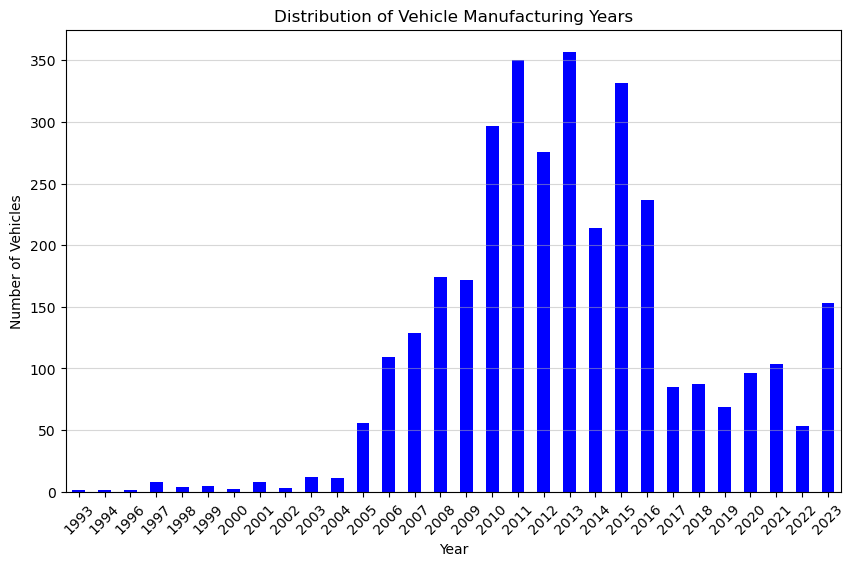

          City Brand    Model  Year        Body Type Color  \
0         Bakı   Kia   Cerato  2019            Sedan   Boz   
1         Bakı   Kia  Sorento  2015  Offroader / SUV  Qara   
2         Bakı   Kia   Cerato  2022            Sedan    Ağ   
3     Sumqayıt   Kia      Rio  2023          Hetçbek    Ağ   
4         Bakı   Kia   Cerato  2020            Sedan   Göy   
...        ...   ...      ...   ...              ...   ...   
3401      Bakı   Kia     Ceed  2007          Hetçbek  Qara   
3402      Bakı   Kia   Optima  2016            Sedan    Ağ   
3403      Bakı   Kia  Sorento  2015  Offroader / SUV    Ağ   
3404      Bakı   Kia   Optima  2016            Sedan    Ağ   
3405      Bakı   Kia     Ceed  2010        Universal  Mavi   

             Engine Details   Mileage Transmission Drive Type İs_New?  \
0     2.0 L/150 a.g./Benzin   25000.0      Avtomat         Ön    Xeyr   
1      2.0 L/184 a.g./Dizel   44000.0      Avtomat        Tam    Xeyr   
2     1.6 L/130 a.g./Benzin       0.

In [272]:
plt.figure(figsize=(10, 6))
df['Year'].value_counts().sort_index().plot(kind='bar', color='blue')
plt.title('Distribution of Vehicle Manufacturing Years')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()
print(df)

In [273]:
city_counts = df['City'].value_counts()
print(city_counts)


City
Bakı          2798
Sumqayıt       342
Gəncə           77
Xırdalan        23
Mingəçevir      12
Zaqatala        12
Tovuz           12
Naxçıvan        10
Şəki            10
Masallı          9
Bərdə            8
Quba             7
Şəmkir           7
Ağdaş            7
Xaçmaz           6
Lənkəran         5
İsmayıllı        5
Qəbələ           4
Qusar            4
Şirvan           4
Cəlilabad        3
Qazax            3
Oğuz             2
Göygöl           2
Göyçay           2
Ucar             2
İmişli           2
Yevlax           2
Gədəbəy          2
Astara           2
Ağcabədi         2
Biləsuvar        2
Salyan           2
Füzuli           1
Kürdəmir         1
Ağdam            1
Göytəpə          1
Şabran           1
Zərdab           1
Liman            1
Sabirabad        1
Ağstafa          1
Neftçala         1
Qobustan         1
Ordubad          1
Hacıqabul        1
Qax              1
Goranboy         1
Laçın            1
Name: count, dtype: int64


In [274]:
average = df.groupby('Condition')['Price'].mean().sort_values()
print(average)

Condition
Vuruğu var, rənglənməyib       15711.222222
Vuruğu var, rənglənib          19741.666667
Vuruğu yoxdur, rənglənib       24414.560694
değer yok                      26622.000000
Vuruğu yoxdur, rənglənməyib    29036.034537
Name: Price, dtype: float64


In [275]:
new_used = df.groupby('İs_New?')[['Price', 'Mileage']].mean()
print(new_used)


                Price       Mileage
İs_New?                            
Bəli     50244.086022       0.00000
Xeyr     27396.741615  161067.96087


In [276]:
average_price = df.groupby('Body Type')['Price'].mean().sort_values()
print(average_price)

Body Type
Avtobus             3500.000000
Furqon              7000.000000
Mikroavtobus       12000.000000
Universal          16114.708609
Hetçbek            16960.780761
Kupe               22500.000000
Yük maşını         25921.428571
Sedan              26412.859599
Liftbek            26547.826087
Offroader / SUV    34230.474785
Minivan            36186.101266
Van                42900.000000
Name: Price, dtype: float64


In [277]:
average_transmission = df.groupby('Transmission')['Price'].mean()
print(average_transmission)

Transmission
Avtomat             31107.579849
Mexaniki            13626.273292
Robotlaşdırılmış    41900.000000
Name: Price, dtype: float64


In [278]:
df['Engine Capacity (L)'] = df['Engine Details'].str.extract(r'(\d+\.\d+)').astype(float)
df['Engine Power (a.g.)'] = df['Engine Details'].str.extract(r'/(\d+)').astype(float)
print(df)

          City Brand    Model  Year        Body Type Color  \
0         Bakı   Kia   Cerato  2019            Sedan   Boz   
1         Bakı   Kia  Sorento  2015  Offroader / SUV  Qara   
2         Bakı   Kia   Cerato  2022            Sedan    Ağ   
3     Sumqayıt   Kia      Rio  2023          Hetçbek    Ağ   
4         Bakı   Kia   Cerato  2020            Sedan   Göy   
...        ...   ...      ...   ...              ...   ...   
3401      Bakı   Kia     Ceed  2007          Hetçbek  Qara   
3402      Bakı   Kia   Optima  2016            Sedan    Ağ   
3403      Bakı   Kia  Sorento  2015  Offroader / SUV    Ağ   
3404      Bakı   Kia   Optima  2016            Sedan    Ağ   
3405      Bakı   Kia     Ceed  2010        Universal  Mavi   

             Engine Details   Mileage Transmission Drive Type İs_New?  \
0     2.0 L/150 a.g./Benzin   25000.0      Avtomat         Ön    Xeyr   
1      2.0 L/184 a.g./Dizel   44000.0      Avtomat        Tam    Xeyr   
2     1.6 L/130 a.g./Benzin       0.

In [279]:
df['Transmission Code'] = df['Transmission'].astype('category').cat.codes
df['Drive Type Code'] = df['Drive Type'].astype('category').cat.codes
df['Is New'] = df['İs_New?'].map({'Xeyr': 0, 'Bəli': 1})  
print(df)

          City Brand    Model  Year        Body Type Color  \
0         Bakı   Kia   Cerato  2019            Sedan   Boz   
1         Bakı   Kia  Sorento  2015  Offroader / SUV  Qara   
2         Bakı   Kia   Cerato  2022            Sedan    Ağ   
3     Sumqayıt   Kia      Rio  2023          Hetçbek    Ağ   
4         Bakı   Kia   Cerato  2020            Sedan   Göy   
...        ...   ...      ...   ...              ...   ...   
3401      Bakı   Kia     Ceed  2007          Hetçbek  Qara   
3402      Bakı   Kia   Optima  2016            Sedan    Ağ   
3403      Bakı   Kia  Sorento  2015  Offroader / SUV    Ağ   
3404      Bakı   Kia   Optima  2016            Sedan    Ağ   
3405      Bakı   Kia     Ceed  2010        Universal  Mavi   

             Engine Details   Mileage Transmission Drive Type  ...  \
0     2.0 L/150 a.g./Benzin   25000.0      Avtomat         Ön  ...   
1      2.0 L/184 a.g./Dizel   44000.0      Avtomat        Tam  ...   
2     1.6 L/130 a.g./Benzin       0.0      Av

In [280]:
numeric_cols = ['Year', 'Mileage', 'Price', 'Engine Capacity (L)', 'Engine Power (a.g.)', 'Is New']
print(numeric_cols)

['Year', 'Mileage', 'Price', 'Engine Capacity (L)', 'Engine Power (a.g.)', 'Is New']


In [281]:
correlation_matrix = df[numeric_cols].corr()

In [282]:
correlation_with_price = correlation_matrix['Price'].sort_values(ascending=False)
print(correlation_with_price)

Price                  1.000000
Year                   0.754606
Is New                 0.395989
Engine Power (a.g.)    0.388668
Engine Capacity (L)    0.237991
Mileage               -0.602684
Name: Price, dtype: float64


In [285]:
df = df.drop(columns=['Engine Details', 'Price'])
print(df)

          City Brand    Model  Year        Body Type Color   Mileage  \
0         Bakı   Kia   Cerato  2019            Sedan   Boz   25000.0   
1         Bakı   Kia  Sorento  2015  Offroader / SUV  Qara   44000.0   
2         Bakı   Kia   Cerato  2022            Sedan    Ağ       0.0   
3     Sumqayıt   Kia      Rio  2023          Hetçbek    Ağ       0.0   
4         Bakı   Kia   Cerato  2020            Sedan   Göy   54000.0   
...        ...   ...      ...   ...              ...   ...       ...   
3401      Bakı   Kia     Ceed  2007          Hetçbek  Qara  224400.0   
3402      Bakı   Kia   Optima  2016            Sedan    Ağ  118000.0   
3403      Bakı   Kia  Sorento  2015  Offroader / SUV    Ağ  122650.0   
3404      Bakı   Kia   Optima  2016            Sedan    Ağ  166000.0   
3405      Bakı   Kia     Ceed  2010        Universal  Mavi  268000.0   

     Transmission Drive Type İs_New?  ... Owner Count  \
0         Avtomat         Ön    Xeyr  ...   değer yok   
1         Avtomat    

In [290]:
le = LabelEncoder()
categorical_columns = ['City', 'Model', 'Body Type', 'Color', 'Transmission', 'Drive Type', 'İs_New?', 'Condition', 'Origin', 'Saler_name']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col].astype(str))
print(df)

      City Brand  Model  Year  Body Type  Color   Mileage  Transmission  \
0       39   Kia     30  2019          2     12   25000.0             0   
1       39   Kia     20  2015         11      5   44000.0             0   
2       39   Kia     30  2022          2      0       0.0             0   
3       22   Kia     14  2023          6      0       0.0             0   
4       39   Kia     30  2020          2     14   54000.0             0   
...    ...   ...    ...   ...        ...    ...       ...           ...   
3401    39   Kia     28  2007          6      5  224400.0             1   
3402    39   Kia      6  2016          2      0  118000.0             0   
3403    39   Kia     20  2015         11      0  122650.0             0   
3404    39   Kia      6  2016          2      0  166000.0             0   
3405    39   Kia     28  2010          3      3  268000.0             1   

      Drive Type  İs_New?  ... Owner Count Condition  Origin  \
0              2        1  ...   de